In [4]:
import numpy as np
import pandas as pd
import sympy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline
sp.init_printing()

# Problem 3
# A

Plot in 3D each of the $d_{z^2}, d_{x^2-y^2}, d_{xy}, d_{yz}, d_{xz}$

First, define a function that will evaluate each d given x,y,z.

Then, create a list of coordinates that cover all combinations of coordinates.

In [290]:
def deval(x,y,z):
    r = np.sqrt(x**2 + y**2 + z**2)
    c = np.sqrt(15/(4*np.pi))
    
    n1 = 3*z**2 - r**2
    d1 = 2*np.sqrt(3)*r**2
    
    n2 = (x**2-y**2)
    d2 = 2*r**2
    
    n3 = x*y
    d3 = r**2
    
    n4 = y*z
    d4 = r**2
    
    n5 = x*z
    d5 = r**2
    
    return c*np.array([n1/d1, n2/d2, n3/d3, n4/d4, n5/d5])


In [291]:
xs = np.linspace(-1,1, 101)
ys = np.array(xs)
zs = np.array(xs)
ind = pd.MultiIndex.from_product((xs,ys,zs))
d = np.zeros((len(ind), 5))

In [292]:
for i,(x,y,z) in enumerate(ind):
    d[i] = deval(x,y,z)

C:\Users\mstev\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [293]:
df = pd.DataFrame(np.around(d,0), index = ind)


In [295]:
df.index = pd.MultiIndex.from_tuples([np.around(vals, 2) for vals in df.index.get_values()])
df.index.names = ['x', 'y', 'z']
df.columns = ['$d_{z^2}$', '$d_{x^2-y^2}$', '$d_{xy}$', '$d_{yz}$', '$d_{xz}$']

Now, I have this 'df' which is a table where the columns are each of the orbitals and the rows are coordinates. The values are 1 and 0 for whether the electron can be measured there or can not be measured there.


Let's see what it looks like in 2D. I can slice along the xy,yz,or xz plane and choose the index $i$ of $[d_{z^2}, d_{x^2-y^2}, d_{xy}, d_{yz}, d_{xz}]$

Text(0.5, 1.0, '$d_{xy}$')

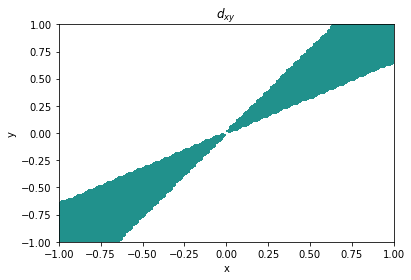

In [299]:
i = 2
lev = 'z'
levs = ['x', 'y','z']
levs.remove(lev)
twod = df.xs(0, level = lev)[df.columns[i]].unstack(0)

plt.contourf(twod.index, twod.columns, twod,levels = [.1,1])
plt.xlabel(levs[0])
plt.ylabel(levs[1])
plt.title(df.columns[i])

Here, I get creative for the plotting since I'm new to matplotlib's 3D API. I replace the 0's with nans since those won't appear on the plot. Then I use a scatter plot to fill in where there are values (of 1 specifically). 

In [301]:
tst =df.replace(0, np.nan)
#x,y,z = 
X,Y,Z = np.array([np.array(vals) for vals in tst.index.get_values()]).transpose()

Again, I can use the $i$ index to select which orbital I want to plot.

Text(0.5, 0.92, '$d_{x^2-y^2}$')

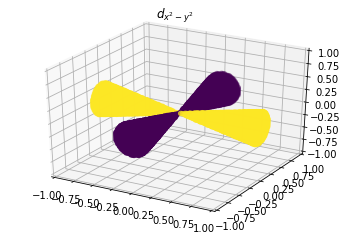

In [302]:
i=1
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(X,Y,Z,c=tst[tst.columns[i]], )
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.title(tst.columns[i])
#st[tst.columns[0]]

# B

First, define everything. I create pseudovariables using sympy (sympy is symbolic-python and lets you use psuedovariables which essentially act as string place holders until you substitute or evaluate for a value) and define all of the $Y_l^{m_l}$ as well as their complex conjugates. Then, I check my work by evaluating all $<Y_l^{m_l*}|Y_l^{m_l}>$ as they should equal 1 or zero. This is just a check on my definitions of the functions.

In [304]:
phi, theta = sp.symbols('phi theta', real = True)

y1 = sp.sqrt(15/(32*sp.pi))*sp.sin(theta)**2*sp.exp(-2*sp.I*phi)
y1star = sp.sqrt(15/(32*sp.pi))*sp.sin(theta)**2*sp.exp(2*sp.I*phi)

y2 = sp.sqrt(15/(8*sp.pi))*sp.sin(theta)*sp.cos(theta)*sp.exp(-sp.I*phi)
y2star = sp.sqrt(15/(8*sp.pi))*sp.sin(theta)*sp.cos(theta)*sp.exp(sp.I*phi)

y3 = sp.sqrt(5/(16*sp.pi))*(3*sp.cos(theta)**2 - 1)
y3star = y3

y4 = -sp.sqrt(15/(8*sp.pi))*sp.sin(theta)*sp.cos(theta)*sp.exp(sp.I*phi)
y4star = -sp.sqrt(15/(8*sp.pi))*sp.sin(theta)*sp.cos(theta)*sp.exp(-sp.I*phi)

y5 = sp.sqrt(15/(32*sp.pi))*sp.sin(theta)**2*sp.exp(2*sp.I*phi)
y5star = sp.sqrt(15/(32*sp.pi))*sp.sin(theta)**2*sp.exp(-2*sp.I*phi)

In [305]:
sp.integrate(y5*y5star*sp.sin(theta), (theta, 0, sp.pi), (phi,0,2*sp.pi)).simplify()

Now, I'll define the orbital d functions and do the same.

In [222]:
c = sp.sqrt(15/(4*sp.pi))
d1 = c*(3*sp.cos(theta)**2 - 1)/(2*sp.sqrt(3))
d2 = c/2 * (sp.cos(phi)**2 - sp.sin(phi)**2)*sp.sin(theta)**2
d3 = c * sp.cos(phi)*sp.sin(phi)*sp.sin(theta)**2
d4 = c * sp.sin(phi)*sp.cos(theta)*sp.sin(theta)
d5 = c * sp.cos(phi)*sp.cos(theta)*sp.sin(theta)

In [314]:
sp.integrate(d2*d2*sp.sin(theta), (theta,0,sp.pi), (phi, 0, 2*sp.pi))

Finally, evaluate $<Y|d>$ for each $Y_l^{m_l}$ and $d_{x,y,z}$

In [308]:
D = [d1,d2,d3,d4,d5]
Y = [y1,y2,y3,y4,y5]
Ystar = [y1star,y2star,y3star,y4star,y5star]
T = np.array([[sp.I]*5]*5)
for i,I in enumerate(D):
    for j,J in enumerate(Ystar):
        T[i,j] = sp.integrate(J*I*sp.sin(theta), (theta,0,sp.pi), (phi, 0, 2*sp.pi))
print(T)

[[0 0 1 0 0]
 [sqrt(2)/2 0 0 0 sqrt(2)/2]
 [sqrt(2)*I/2 0 0 0 -sqrt(2)*I/2]
 [0 sqrt(2)*I/2 0 sqrt(2)*I/2 0]
 [0 sqrt(2)/2 0 -sqrt(2)/2 0]]


# Check

$[T][Y]-[D] = 0$
If this statement is not true, then there's something wrong with my evaluation.

**The second line is messy because I have to force sympy to evaluate

$e^{i \phi} = cos(\phi) + isin(\phi)$

In [311]:
fin = np.inner(T,np.transpose(Y)) - D

[me.subs(sp.exp(sp.I*phi), sp.cos(phi)+sp.I*sp.sin(phi)).simplify() for me in fin]

In [326]:
np.inner(np.inner(T,[[-2,0,0,0,0],[0,-1,0,0,0],[0,0,0,0,0],[0,0,0,1,0],[0,0,0,0,2]]),

array([[0, 0, 0, 0, 0],
       [0, 1, -sqrt(2), -1, 0],
       [0, -I, -sqrt(2)*I, I, 0],
       [-I/2, -1/2, 0, -1/2, -I/2],
       [-1/2, -I/2, 0, -I/2, -1/2]], dtype=object)

In [327]:
https://www.nature.com/articles/s41598-018-38023-2

array([[zoo, zoo, 1, zoo, zoo],
       [sqrt(2), zoo, zoo, zoo, sqrt(2)],
       [-sqrt(2)*I, zoo, zoo, zoo, sqrt(2)*I],
       [zoo, -sqrt(2)*I, zoo, -sqrt(2)*I, zoo],
       [zoo, sqrt(2), zoo, -sqrt(2), zoo]], dtype=object)